<a href="https://colab.research.google.com/github/himalayahall/cuny-bridge-math/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
def evenodd(num : int) -> None :
  '''
  Chapter 1 Problem #1: Even-Odd Vending Machine
  Try writing an “even-odd vending machine,” which will take a number as input
  and do two things
  1. Print whether the number is even or odd.
  2. Display the number followed by the next 9 even or odd numbers.
  If the input is 2, the program should print even and then print 2, 4, 6, 8, 10,
  12, 14, 16, 18, 20. Similarly, if the input is 1, the program should print odd
  and then print 1, 3, 5, 7, 9, 11, 13, 15, 17, 19. Your program should use the
  is_integer() method to display an error message if the input is a number with
  significant digits beyond the decimal point.
  Doing Math with Python by Amit Saha
  '''
  if (isinstance(num, int) == False):
    if (isinstance(num, float) == False or num.is_integer() == False):
      raise Exception("Invalid argument (must be integer): " + num)

  if (num % 2 == 0):
    print (str(num) + " is even")
  else:
    print (str(num) + " is odd")

  for i in range(0, 10):
    print(num + i * 2)
  

In [48]:
#evenodd(1)

1 is odd
1
3
5
7
9
11
13
15
17
19


In [91]:
import matplotlib.pyplot as plt
from typing import List, Set, Dict, Tuple, Optional

In [120]:
def quad(x : float, a : float, b : float, c : float) -> float:
  '''
  Quadratic function.
  Params:
    x : x value
    a : a value, cannot be 0.
    b : b value
    c : constant value
  Returns: a*sqr(x)+b*x+c
  '''
  if (a == 0):
    raise Exception("Invalid argument (a cannot be 0)")
  return (a * pow(x, 2)) + (b * x) + c

In [121]:
def draw_plot(x :  List[float], y : List[float]) -> None:
  '''
  Draws plot.
  Params:
    x : x values
    y : y values
  '''    
  plt.plot(x, y, marker='o')
  plt.xlabel('x-axis')

  plt.ylabel('y-axis')
  plt.title('Quadratic Function')

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[81, 64, 49, 36, 25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


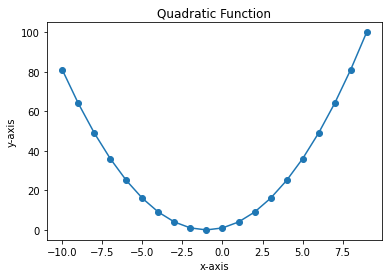

In [122]:
x = [item for item in range(-10, 10)]
y = [quad(item, 1, 2, 1) for item in x]
draw_plot(x, y)
print(x)
print(y)